In [1]:
# https://github.com/shreyasvedpathak/Tensorflow-Advanced-Techniques-Solutions/blob/main/Course%201/Week1_Assignment.ipynb

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import os

import utils # this is for unit tests, note that some don't work unless you paste the test in the same cell (eager excecution?)

In [2]:
path_base = '../dataset/quality/'
white_ds = path_base + 'white.csv'
red_ds = path_base + 'red.csv'


white_ds = pd.read_csv(white_ds, sep=";")
red_ds = pd.read_csv(red_ds, sep=";")


In [23]:
red_ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [3]:
# fill the `is_red` column with zeros.
white_ds["is_red"] = 0

white_ds = white_ds.drop_duplicates()
red_ds = red_ds.drop_duplicates()
utils.test_white_df(white_ds)



 All public tests passed


In [4]:
print(white_ds.alcohol[0])
print(white_ds.alcohol[100])
# EXPECTED OUTPUT
# 8.8
# 9.1

8.8
9.1


In [5]:
red_ds["is_red"] = 1
utils.test_red_df(red_ds)


 All public tests passed


In [6]:
print(red_ds.alcohol[0])
print(red_ds.alcohol[100])

# EXPECTED OUTPUT
# 9.4
# 10.2

9.4
10.2


In [7]:
white_ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.0
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835,0.0
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.0
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000,0.0
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000,0.0
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000,0.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,0.0


In [8]:
red_ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.0
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252,1.0
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000,1.0
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000,1.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.0


In [9]:
ds = pd.concat([red_ds, white_ds], ignore_index=True)
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.255451
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,0.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [10]:
# NOTE: In a real-world scenario, you should shuffle the data.
# YOU ARE NOT going to do that here because we want to test
# with deterministic data. But if you want the code to do it,
# it's in the commented line below:

#df = df.iloc[np.random.permutation(len(df))]

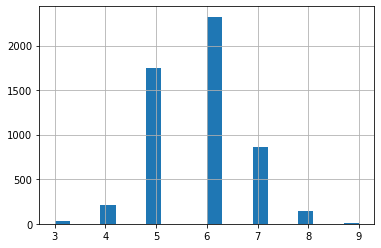

In [11]:
ds['quality'].hist(bins=20);

In [12]:
# comme tu veux il n y a pas beaucoup de data dans quality
# 3,4,8,9 pour cette reason nous allons delete ces columns

ds = ds[(ds['quality'] > 4) & (ds['quality'] < 8 )]
ds = ds.reset_index(drop=True)

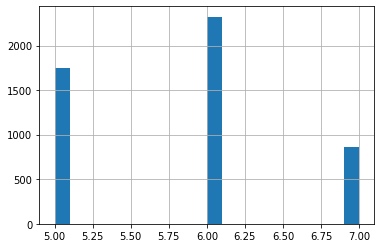

In [13]:
ds['quality'].hist(bins=20);

In [14]:
utils.test_df_drop(ds)


 All public tests passed


In [15]:
# split df into 80:20 train and test sets
train, test = train_test_split(ds, test_size=0.2, random_state = 1)
                               
# split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=0.2, random_state = 1)

utils.test_data_sizes(train.size, test.size, val.size)


 All public tests passed


In [16]:
train_stats = train.describe()
train_stats.pop('is_red') # label
train_stats.pop('quality') #label
train_stats = train_stats.transpose()
train_stats


,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


In [17]:

def format_output(data):
    '''this function doubles as removing the label form the train ds
    and for getting the labels as output, the pop
    function changes the original input data, therefore we do remove
    the label cols out of the input ds'''
    is_red = data.pop('is_red') #pop function removed it for good from the input dataframe
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [18]:
# format the output of the train set
train_Y = format_output(train)

# format the output of the val set
val_Y = format_output(val)
    
# format the output of the test set
test_Y = format_output(test)

In [19]:
utils.test_format_output(ds, train_Y, val_Y, test_Y)


 All public tests passed


In [20]:
train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
3557,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
3825,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4
1740,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8
1221,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9


In [21]:
def norm(x):
    '''data normalization formula'''
    return (x - train_stats['mean']) / train_stats['std']

# normalize the train set
norm_train_X = norm(train)
    
# normalize the val set
norm_val_X = norm(val)
    
# normalize the test set
norm_test_X = norm(test)

utils.test_norm(norm_train_X, norm_val_X, norm_test_X, train, val, test)


 All public tests passed


In [22]:
def base_model(inputs):
    
    # connect a Dense layer with 128 neurons and a relu activation
    x = Dense(units=128, activation='relu')(inputs)
    
    # connect another Dense layer with 128 neurons and a relu activation
    x = Dense(units=128, activation='relu')(x)
    return x

utils.test_base_model(base_model)
# test_inputs = tf.keras.layers.Input(shape=(11,))
# test_output = base_model(test_inputs)
# test_model = Model(inputs=test_inputs, outputs=test_output)
# type(test_model.layers[-1]) == Dense

return_type_check: Return type is incorrect. Please check implementation.
Expected: <class 'tensorflow.python.framework.ops.Tensor'>
Result: <class 'keras.engine.keras_tensor.KerasTensor'>
Please open utils.py if you want to see the unit test here.

 5  Tests passed
 1  Tests failed


Exception: Output layer type is incorrect. Please check implementation.

In [36]:
# we will define two outputs
# the first one is a linear regression of the quality
# the second is a classification if whether it is red or white
# in the second case since it is a linear problem we don't need to add a non-linearity 
# since a linear model will be enough we will not add a non-linear activation function
# and we will settle with the linear coffienets (weights) the model will output for the regression

def final_model(inputs):
    x = base_model(inputs)
    # 1 unit(neuron) becaue we need a single number for quality
    quality_regression = Dense(units=1, name="quality_regression")(x)
    # 1 unit since it is a binary classifcation, 1 or 0 kinda thing, either red or not
    is_red_classification = Dense(units=1, activation="sigmoid", name='type_classifcation')(x)
    
    return Model(inputs=[inputs], outputs=[quality_regression, is_red_classification])


# utils.test_final_model(final_model) # ignore failure


In [30]:
inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model = final_model(inputs)
model.compile(
    optimizer=rms, loss={'type_classifcation':'binary_crossentropy', 'quality_regression':'mse'}, 
    metrics = {'type_classifcation': 'accuracy', 'quality_regression': tf.keras.metrics.RootMeanSquaredError()}
             )
model.metrics

[]

In [35]:
# utils.test_model_compile(model) #empty metrics is a known bug, will fix itself after fitting


In [32]:

history = model.fit(norm_train_X, train_Y,
                    epochs = 180, validation_data=(norm_val_X, val_Y))

Epoch 1/180
99/99 [==============================] - 2s 5ms/step - loss: 22.4026 - quality_regression_loss: 21.7151 - type_classifcation_loss: 0.6875 - quality_regression_root_mean_squared_error: 4.6599 - type_classifcation_accuracy: 0.5436 - val_loss: 15.4466 - val_quality_regression_loss: 14.7756 - val_type_classifcation_loss: 0.6710 - val_quality_regression_root_mean_squared_error: 3.8439 - val_type_classifcation_accuracy: 0.6324
Epoch 2/180
99/99 [==============================] - 0s 4ms/step - loss: 10.0495 - quality_regression_loss: 9.4179 - type_classifcation_loss: 0.6317 - quality_regression_root_mean_squared_error: 3.0689 - type_classifcation_accuracy: 0.7315 - val_loss: 5.8082 - val_quality_regression_loss: 5.2128 - val_type_classifcation_loss: 0.5954 - val_quality_regression_root_mean_squared_error: 2.2832 - val_type_classifcation_accuracy: 0.7541
Epoch 3/180
99/99 [==============================] - 0s 4ms/step - loss: 4.1352 - quality_regression_loss: 3.6023 - type_classifc

In [33]:
loss, quality_loss, type_loss, quality_rmse, type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'quality_loss: {quality_loss}')
print(f'type_loss: {type_loss}')
print(f'quality_rmse: {quality_rmse}')
print(f'type_accuracy: {type_accuracy}')

# EXPECTED VALUES
# ~ 0.30 - 0.38
# ~ 0.30 - 0.38
# ~ 0.018 - 0.030
# ~ 0.50 - 0.62
# ~ 0.97 - 1.0

# Example:
#0.3657050132751465
#0.3463745415210724
#0.019330406561493874
#0.5885359048843384
#0.9974651336669922

25/25 [==============================] - 0s 3ms/step - loss: 0.3463 - quality_regression_loss: 0.3219 - type_classifcation_loss: 0.0244 - quality_regression_root_mean_squared_error: 0.5674 - type_classifcation_accuracy: 0.9949

loss: 0.3462921380996704
quality_loss: 0.32190608978271484
type_loss: 0.02438601292669773
quality_rmse: 0.567367672920227
type_accuracy: 0.9949302673339844


In [37]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

print(quality_pred[0])

# EXPECTED OUTPUT
# 5.6 - 6.0

print(type_pred[0])
print(type_pred[944])

# EXPECTED OUTPUT
# A number close to zero
# A number close to or equal to 1

[5.713019]
[7.718702e-05]
[0.9999987]


In [58]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)
    
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")

def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt           


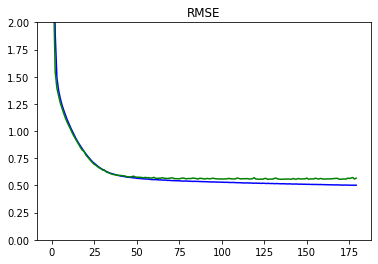

In [59]:
plot_metrics('quality_regression_root_mean_squared_error', 'RMSE', ylim=2)
# history.history.keys()

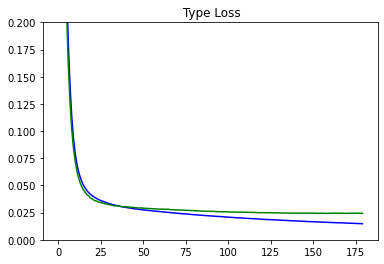

In [61]:
plot_metrics('type_classifcation_loss', ' Type Loss', ylim=0.2)

/home/mo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/mo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


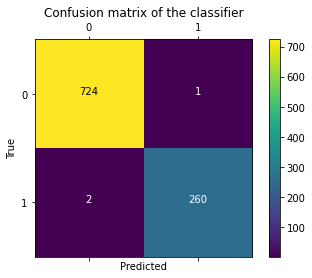

In [54]:
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Type', labels = [0, 1])

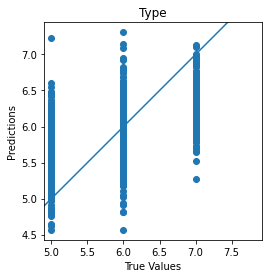

In [55]:
scatter_plot = plot_diff(test_Y[0], quality_pred, title='Type')